In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data file
data = pd.read_excel('globalterrorismdb_0522dist.xlsx')
# print first 5 rows
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# keep only the data for Europe
df = data[data['region_txt'].str.contains('Europe')]

In [4]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
12,197001080001,1970,1,8,NaN,0,NaT,98,Italy,8,...,NaN,NaN,NaN,NaN,Hijacking DB,-9,-9,1,1,NaN
15,197001100001,1970,1,10,NaN,0,NaT,499,East Germany (GDR),9,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
34,197001280001,1970,1,28,NaN,0,NaT,499,East Germany (GDR),9,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
59,197002100001,1970,2,10,NaN,0,NaT,362,West Germany (FRG),8,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209639,202012280017,2020,12,28,NaN,0,NaT,167,Russia,9,...,The victims included Magomed Djabrailov.,"""Policeman killed in Chechnya knife attack,"" R...","""One Police Officer, Two Attackers Killed In K...","""Ramzan Kadyrov reports calm situation in Groz...",START Primary Collection,0,0,0,0,NaN
209640,202012280018,2020,12,28,NaN,0,NaT,53,Cyprus,8,...,NaN,"""Bomb Explodes Outside Medical Center in Cypru...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
209682,202012300012,2020,12,30,2020-12-20 00:00:00,0,NaT,167,Russia,9,...,NaN,"""Law Enforcement,"" Russia & CIS Military Weekl...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
209697,202012310010,2020,12,31,NaN,0,NaT,78,Greece,8,...,NaN,"""Nea: The explosion took place near the Athens...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


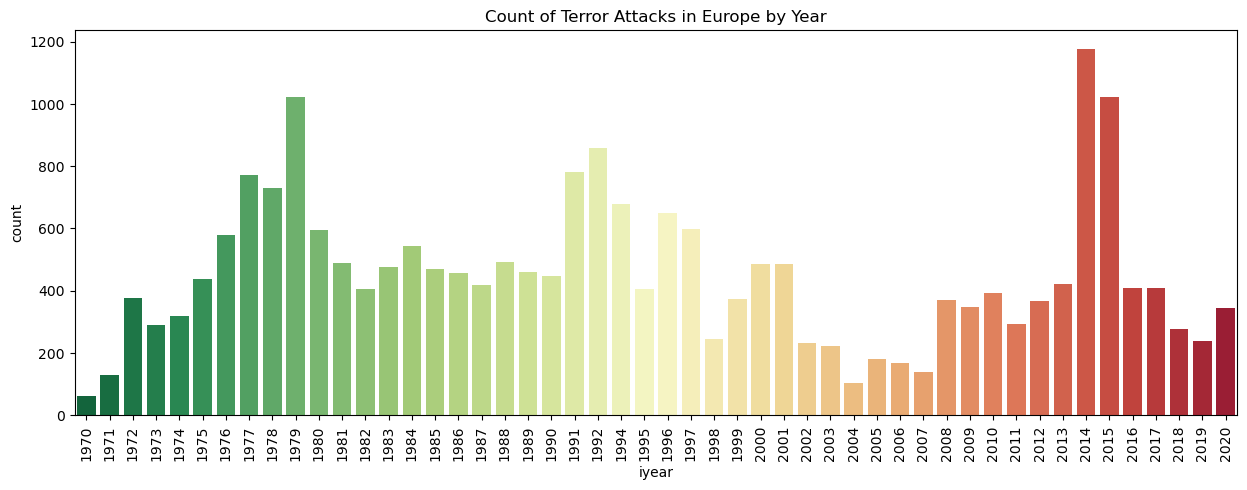

In [5]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='iyear', palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Count of Terror Attacks in Europe by Year')
plt.show()

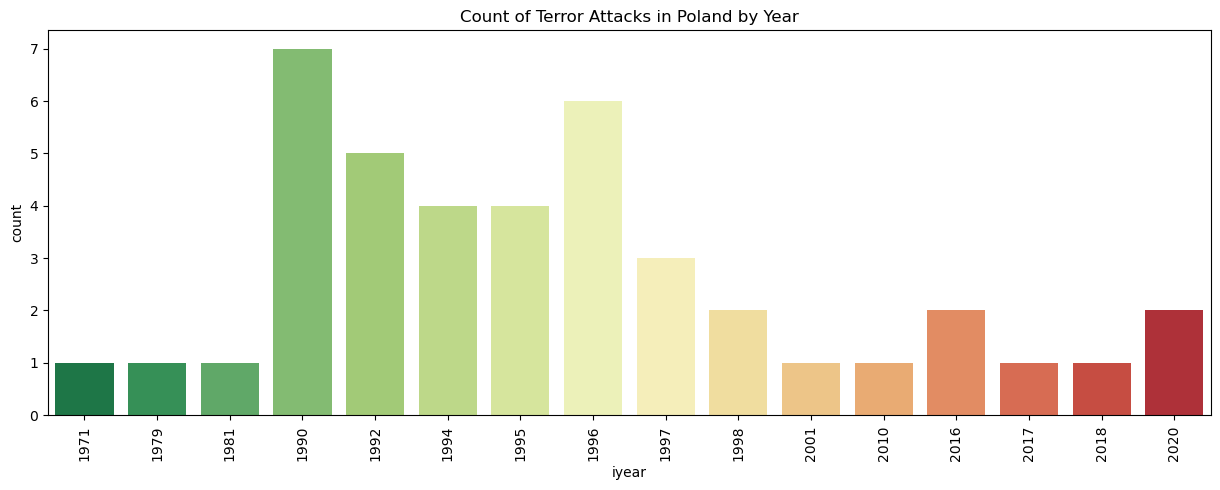

In [6]:
sub_data = df[df['country_txt'] == 'Poland']

plt.figure(figsize=(15, 5))
sns.countplot(data=sub_data, x='iyear', palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Count of Terror Attacks in Poland by Year')
plt.show()

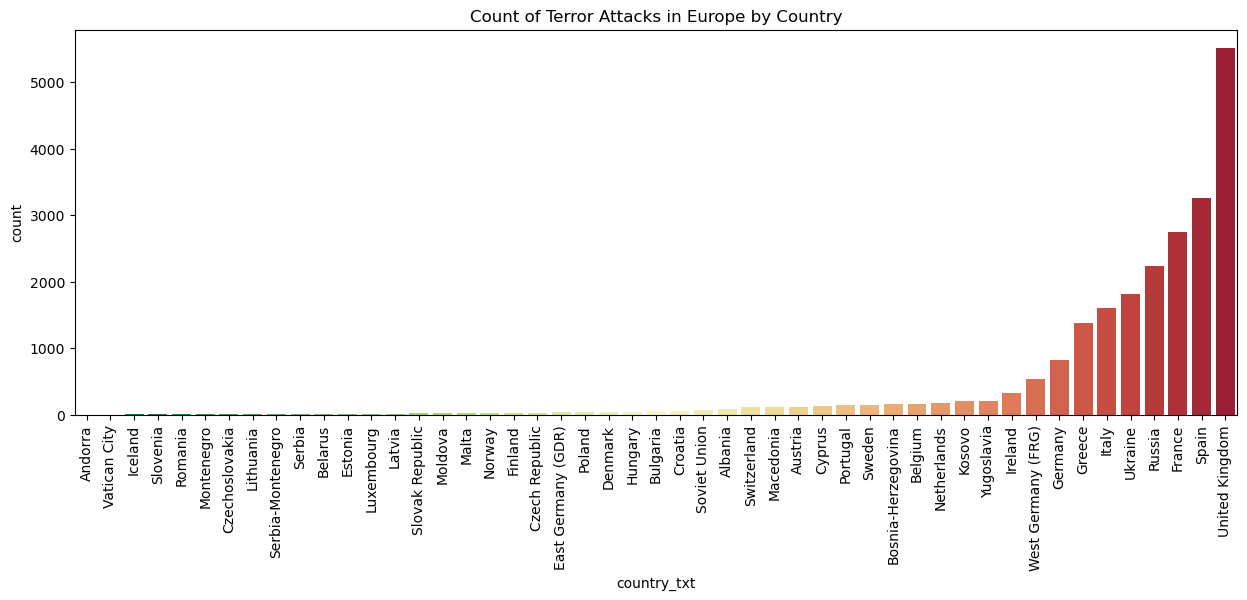

In [7]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='country_txt', palette='RdYlGn_r',
              order=df['country_txt'].value_counts().sort_values(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Count of Terror Attacks in Europe by Country')

plt.show()

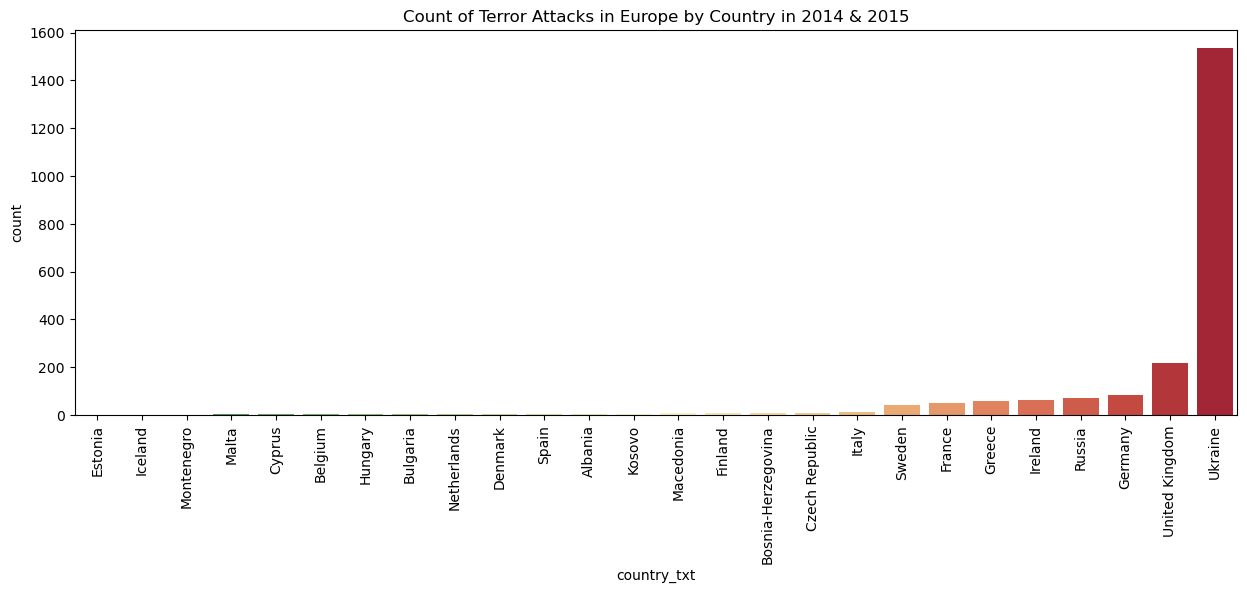

In [8]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=sub_data, x='country_txt', palette='RdYlGn_r',
              order=sub_data['country_txt'].value_counts().sort_values(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Count of Terror Attacks in Europe by Country in 2014 & 2015')

plt.show()

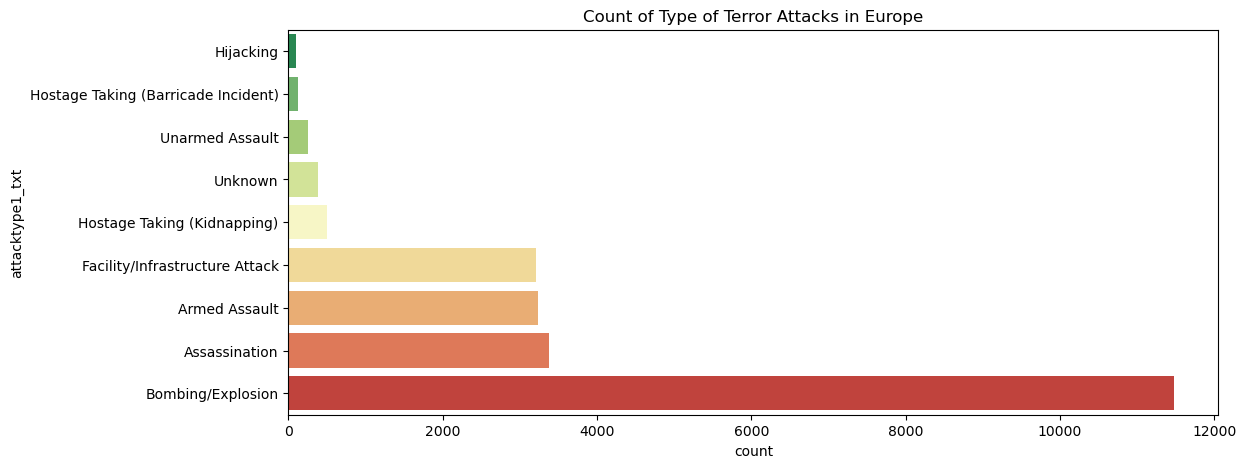

In [9]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, y='attacktype1_txt', palette='RdYlGn_r',
              order=df['attacktype1_txt'].value_counts().sort_values(ascending=True).index)
plt.title('Count of Type of Terror Attacks in Europe')
plt.show()

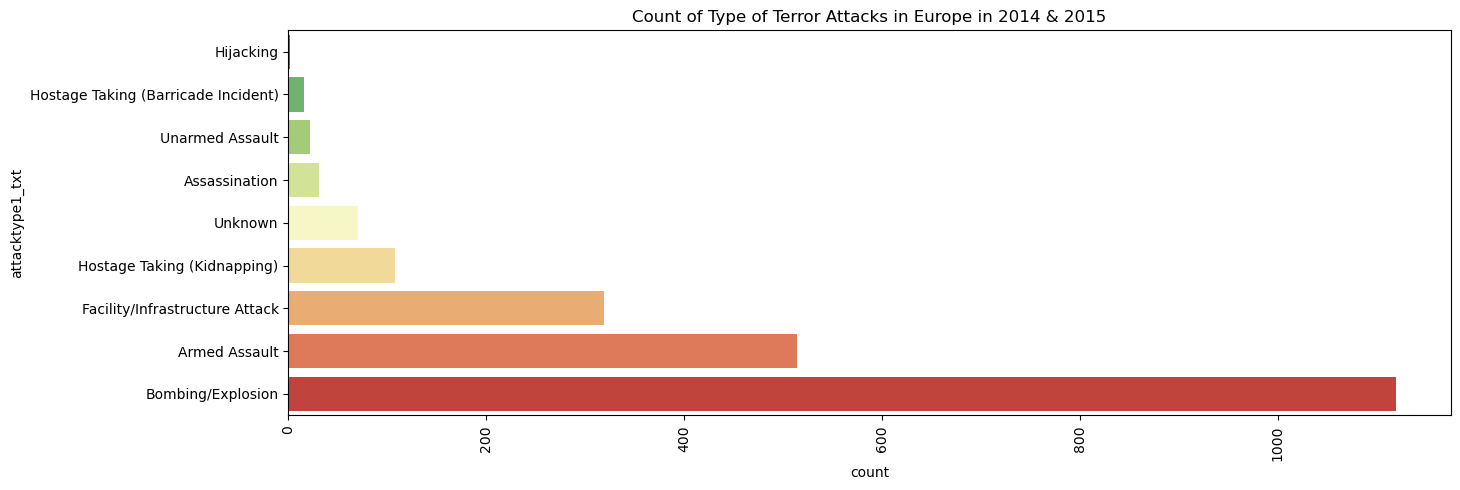

In [10]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=sub_data, y='attacktype1_txt', palette='RdYlGn_r',
              order=sub_data['attacktype1_txt'].value_counts().sort_values(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Count of Type of Terror Attacks in Europe in 2014 & 2015')

plt.show()

In [86]:
# Create a choropleth map using Plotly Express
fig = px.choropleth(
    df['country_txt'].value_counts().reset_index(),
    locations='country_txt',
    locationmode='country names',
    color='count', scope='europe',
    color_continuous_scale="reds",
    title='Heatmap of Terror Attacks in Europe',
    labels={'count': 'No. of terror attacks'}
)

# Show the figure
# fig.show(renderer="svg")
fig.show()

In [37]:
# # Create a choropleth map using Plotly Express
fig = px.choropleth(
    data.groupby(['country_txt', 'iyear']).size().reset_index().rename(columns={0: 'count'}).sort_values('iyear'),
    locations='country_txt', animation_frame="iyear",
    locationmode='country names',
    color='count', scope='europe',
    color_continuous_scale="reds",
    title='Heatmap Terror Attacks in Europe by Year',
    labels={'count': 'No. of terror attacks'}
)

# Show the figure
fig.show()

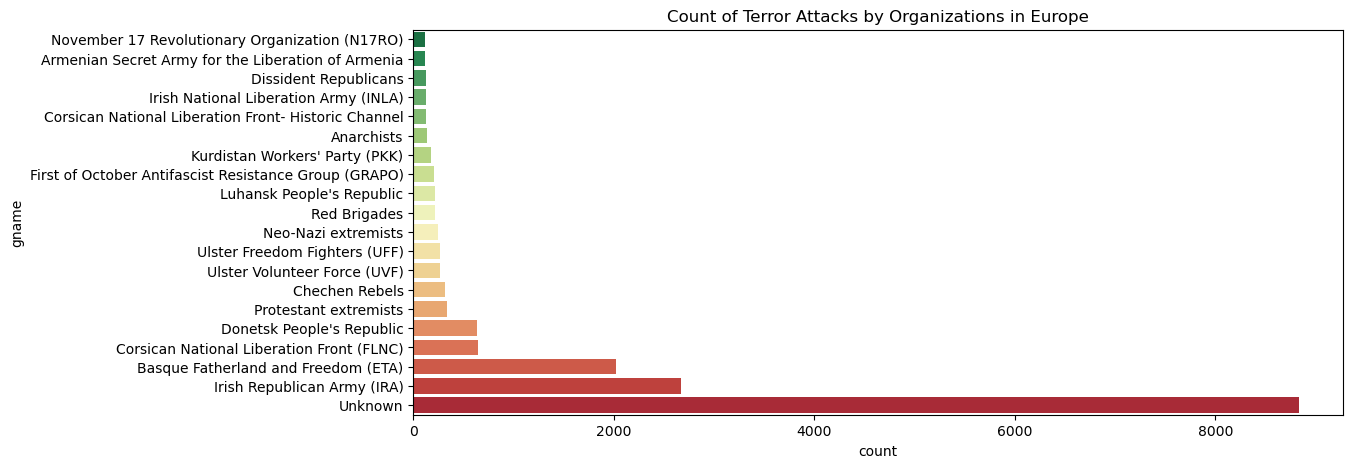

In [15]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, y='gname', palette='RdYlGn_r',
              order=df['gname'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Organizations in Europe')
plt.show()

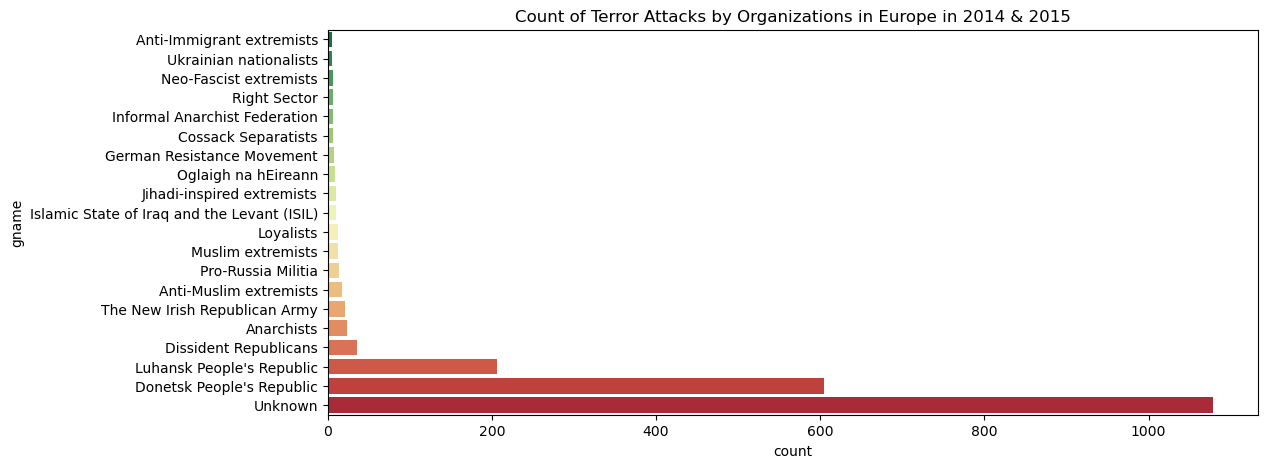

In [16]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='gname', palette='RdYlGn_r',
              order=sub_data['gname'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Organizations in Europe in 2014 & 2015')
plt.show()

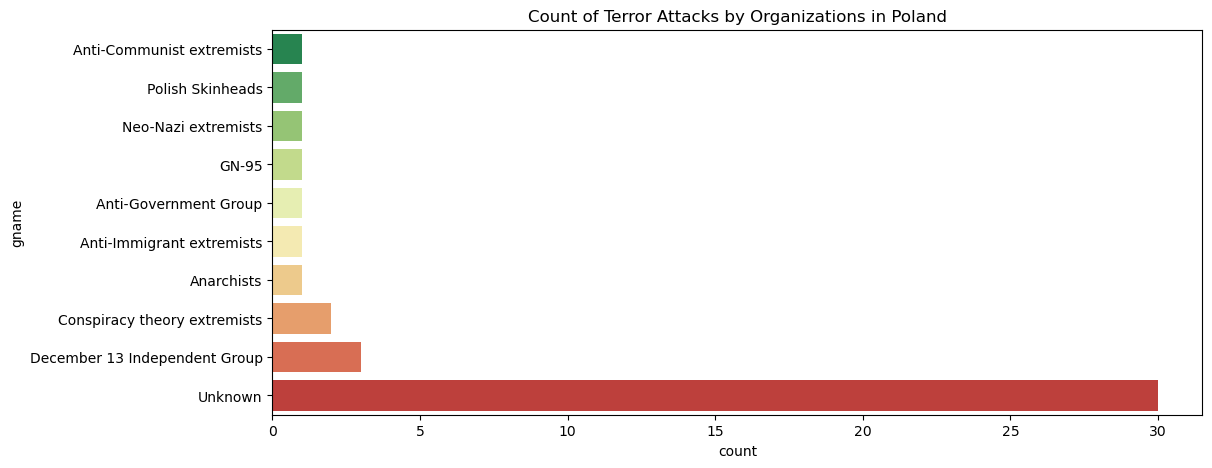

In [17]:
sub_data = df[df['country_txt'] == 'Poland']


plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='gname', palette='RdYlGn_r',
              order=sub_data['gname'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Organizations in Poland')
plt.show()

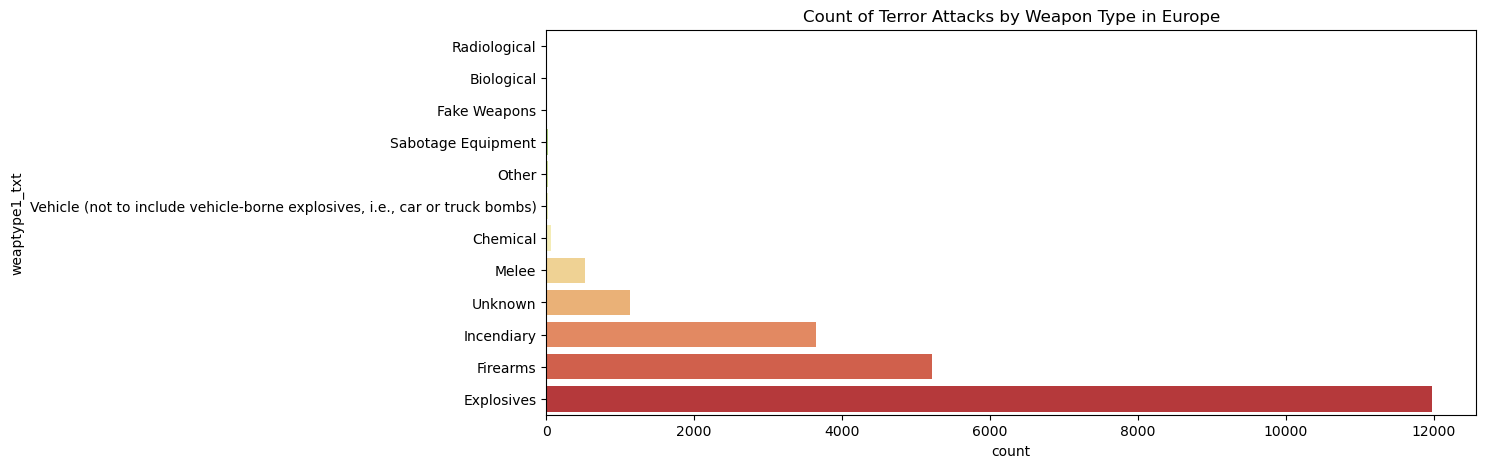

In [18]:

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, y='weaptype1_txt', palette='RdYlGn_r',
              order=df['weaptype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Weapon Type in Europe')

plt.show()

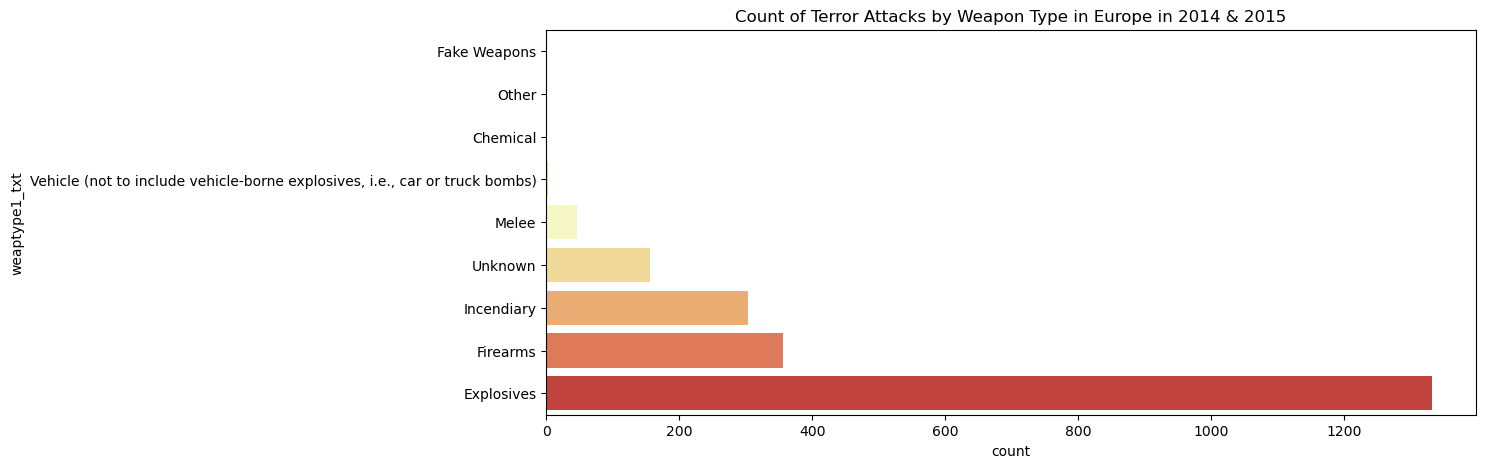

In [19]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='weaptype1_txt', palette='RdYlGn_r',
              order=sub_data['weaptype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Weapon Type in Europe in 2014 & 2015')

plt.show()

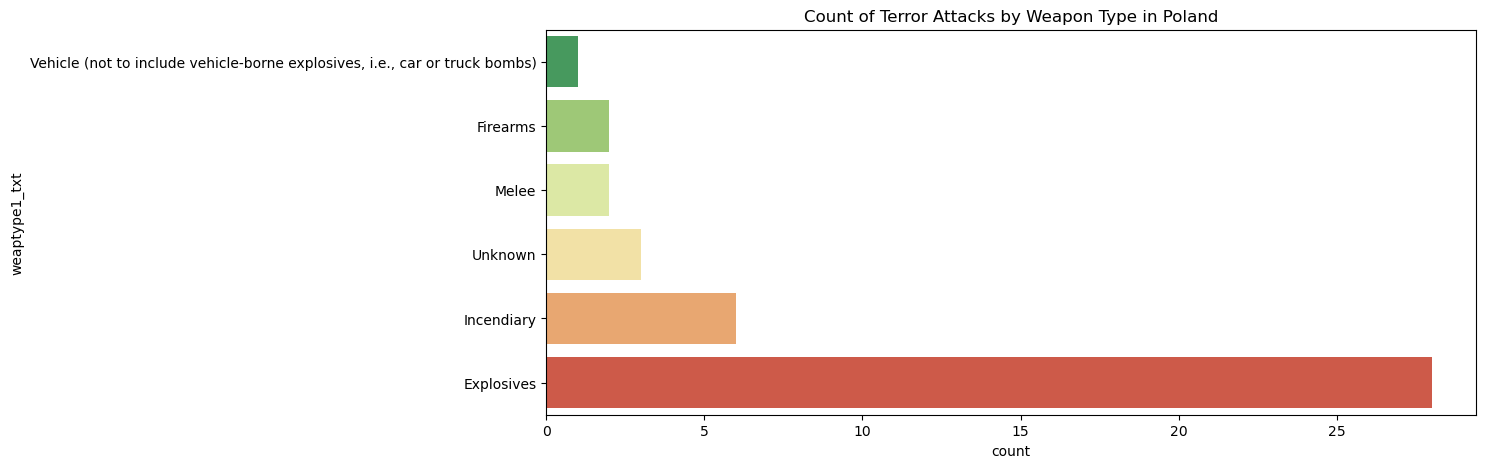

In [20]:
sub_data = df[df['country_txt'] == 'Poland']

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='weaptype1_txt', palette='RdYlGn_r',
              order=sub_data['weaptype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks by Weapon Type in Poland')

plt.show()

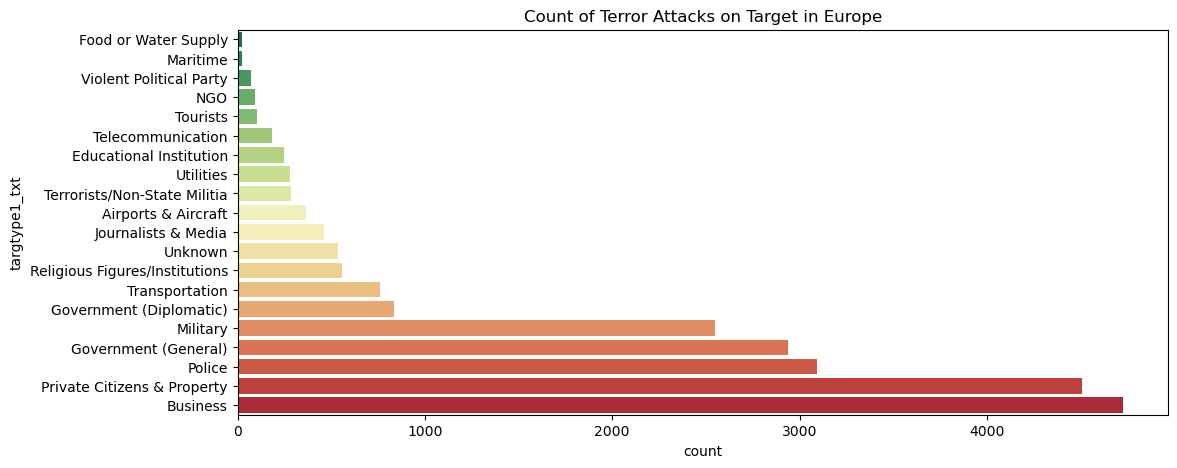

In [21]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, y='targtype1_txt', palette='RdYlGn_r',
              order=df['targtype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks on Target in Europe')

plt.show()

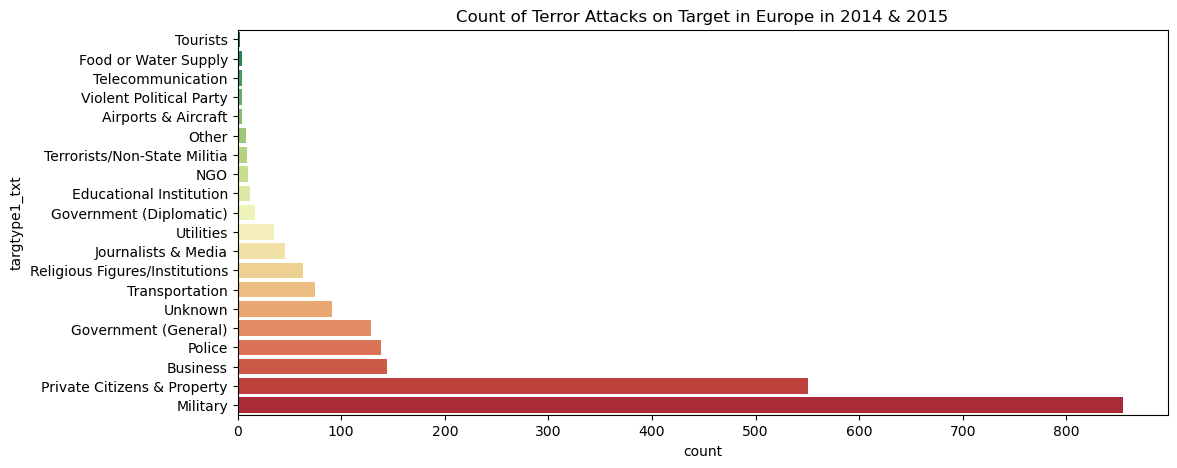

In [22]:
sub_data = df[df['iyear'].isin([2014, 2015])]

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='targtype1_txt', palette='RdYlGn_r',
              order=sub_data['targtype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks on Target in Europe in 2014 & 2015')

plt.show()

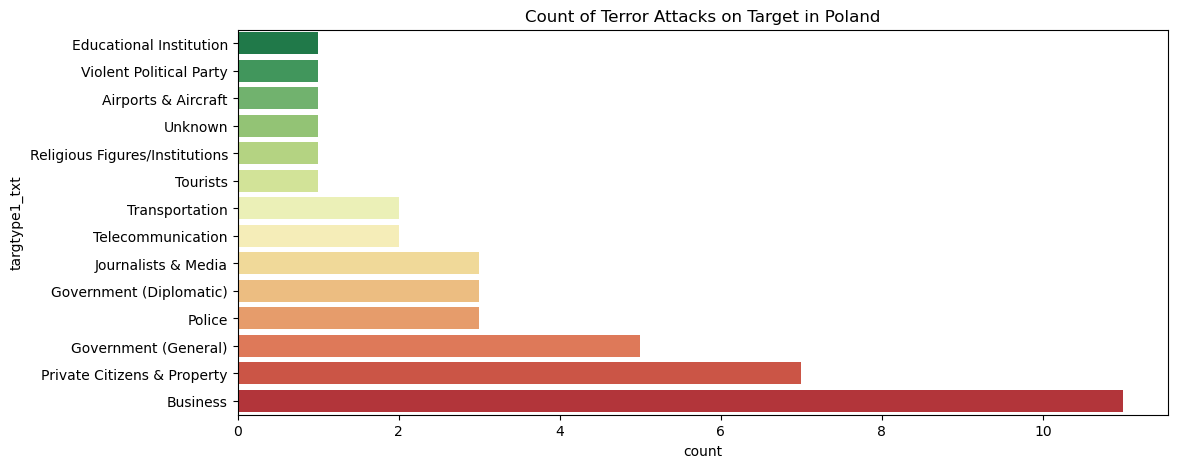

In [23]:
sub_data = df[df['country_txt'] == 'Poland']

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=sub_data, y='targtype1_txt', palette='RdYlGn_r',
              order=sub_data['targtype1_txt'].value_counts().sort_values(ascending=True).tail(20).index)
plt.title('Count of Terror Attacks on Target in Poland')

plt.show()

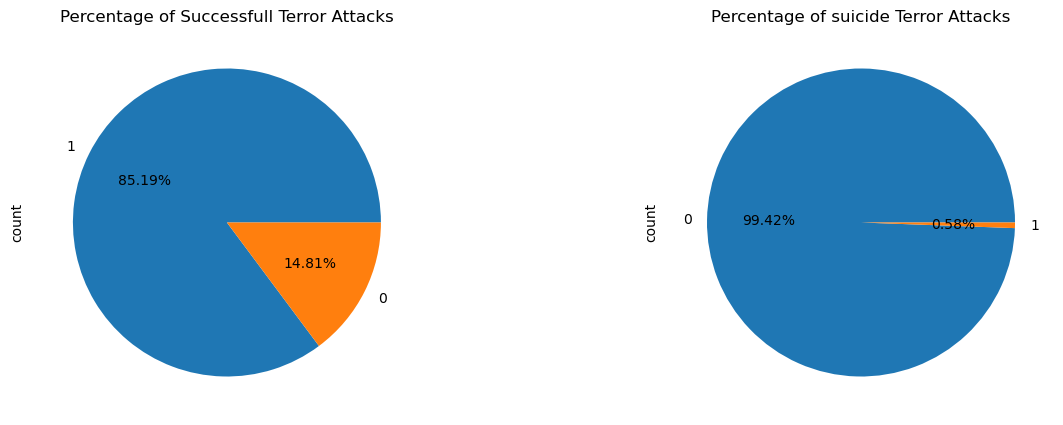

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
df['success'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1)
ax1.set_title('Percentage of Successfull Terror Attacks')

df['suicide'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax2)
ax2.set_title('Percentage of suicide Terror Attacks')

plt.show()

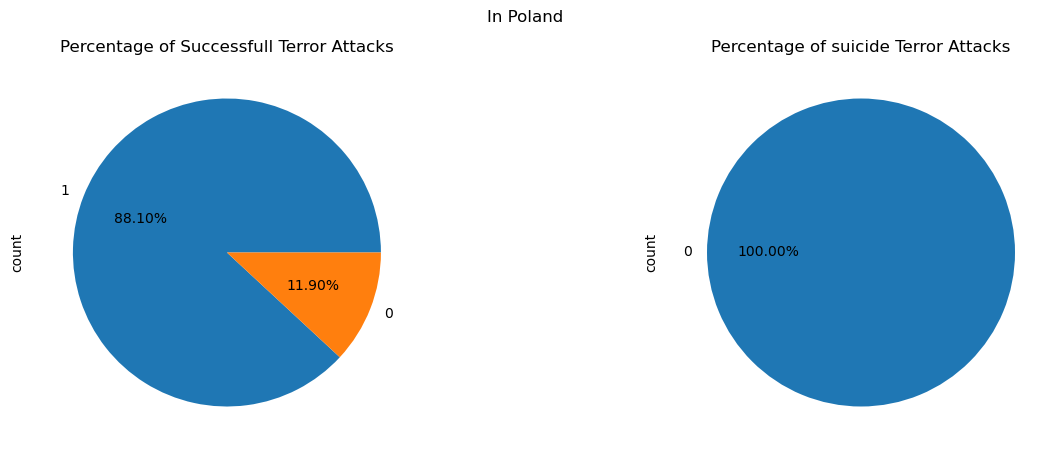

In [26]:
sub_data = df[df['country_txt'] == 'Poland']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sub_data['success'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1)
ax1.set_title('Percentage of Successfull Terror Attacks')

sub_data['suicide'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax2)
ax2.set_title('Percentage of suicide Terror Attacks')

fig.suptitle('In Poland')
plt.show()

In [27]:
df['casualities'] = df['nkill'] + df['nwound']

In [31]:
def get_label(total):
    if str(total).lower() == 'nan':
        return 0
    if total == 0:
        return 0
    return 1
df['casualities_category'] = df['casualities'].apply(get_label)

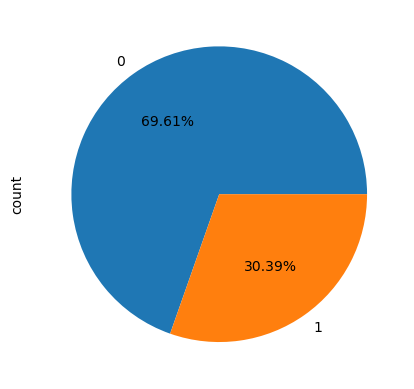

In [32]:
df['casualities_category'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

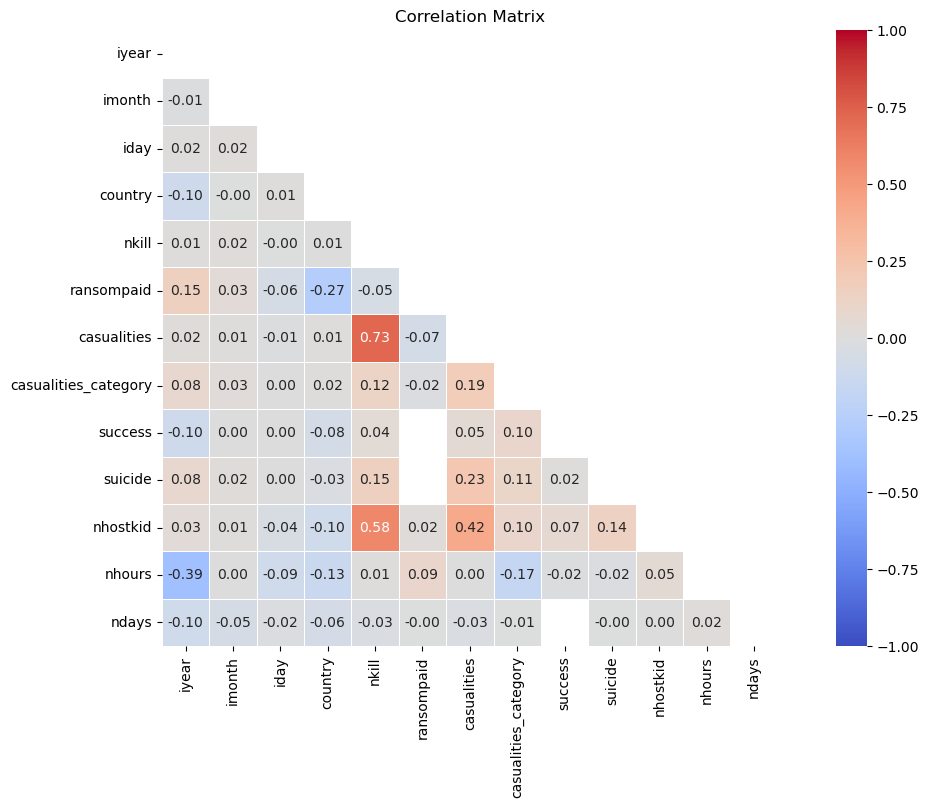

In [65]:
corr = df[["iyear","imonth", "iday","country", "nkill", "ransompaid", "casualities", "casualities_category",
           "success", "suicide", "nhostkid","nhours","ndays"]].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True, fmt='.2f',
            square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

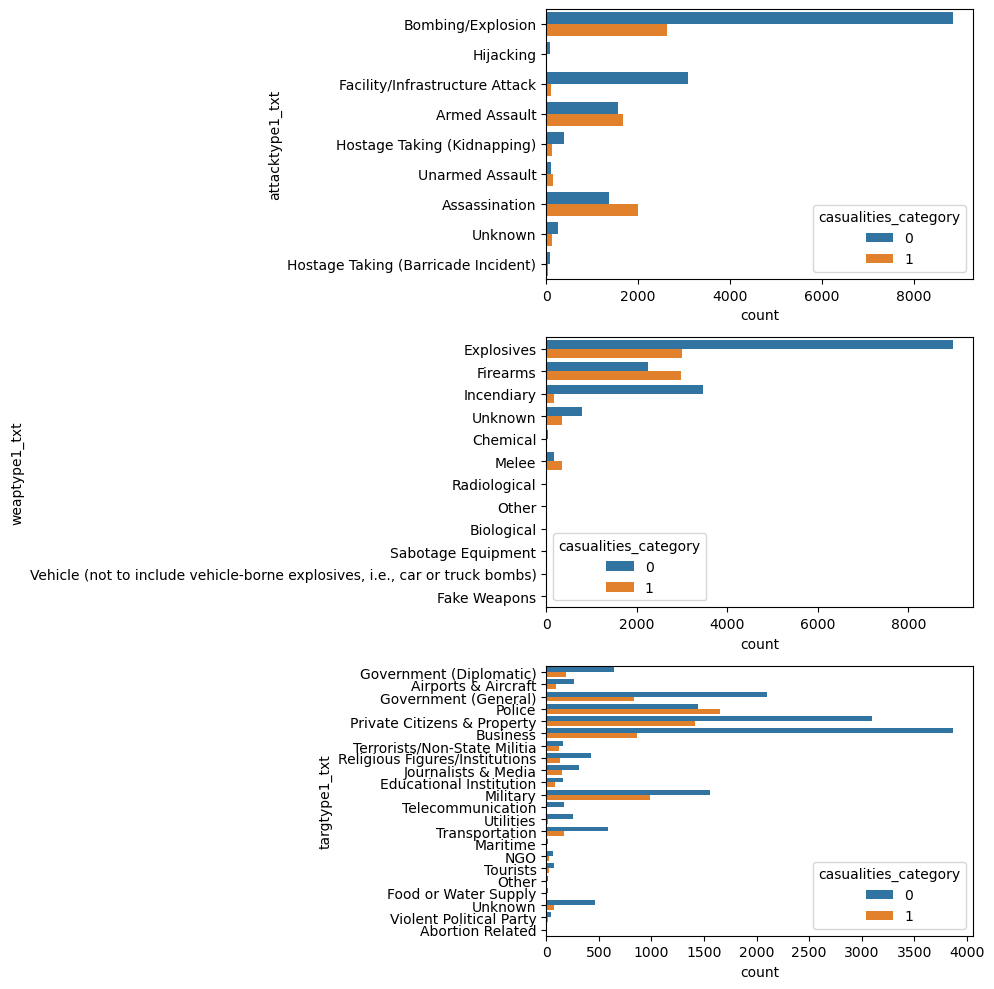

In [42]:
cols = ['attacktype1_txt', 'weaptype1_txt', 'targtype1_txt']
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

for col, ax in zip(cols, axs):
    sns.countplot(data=df, y=col, hue='casualities_category', ax=ax)
fig.tight_layout()
fig.show()

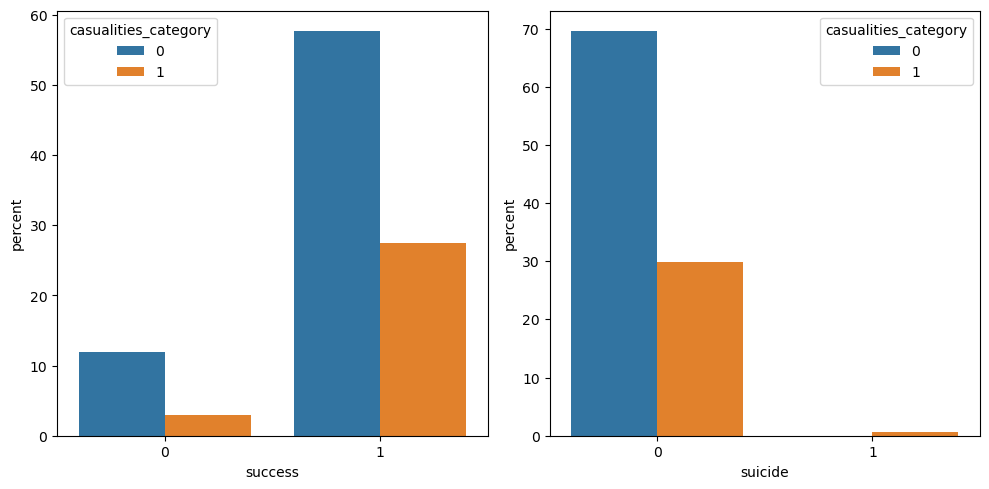

In [52]:
cols = ['success', 'suicide']
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for col, ax in zip(cols, axs):
    sns.countplot(data=df, x=col, hue='casualities_category', stat='percent', ax=ax)
fig.tight_layout()
fig.show()

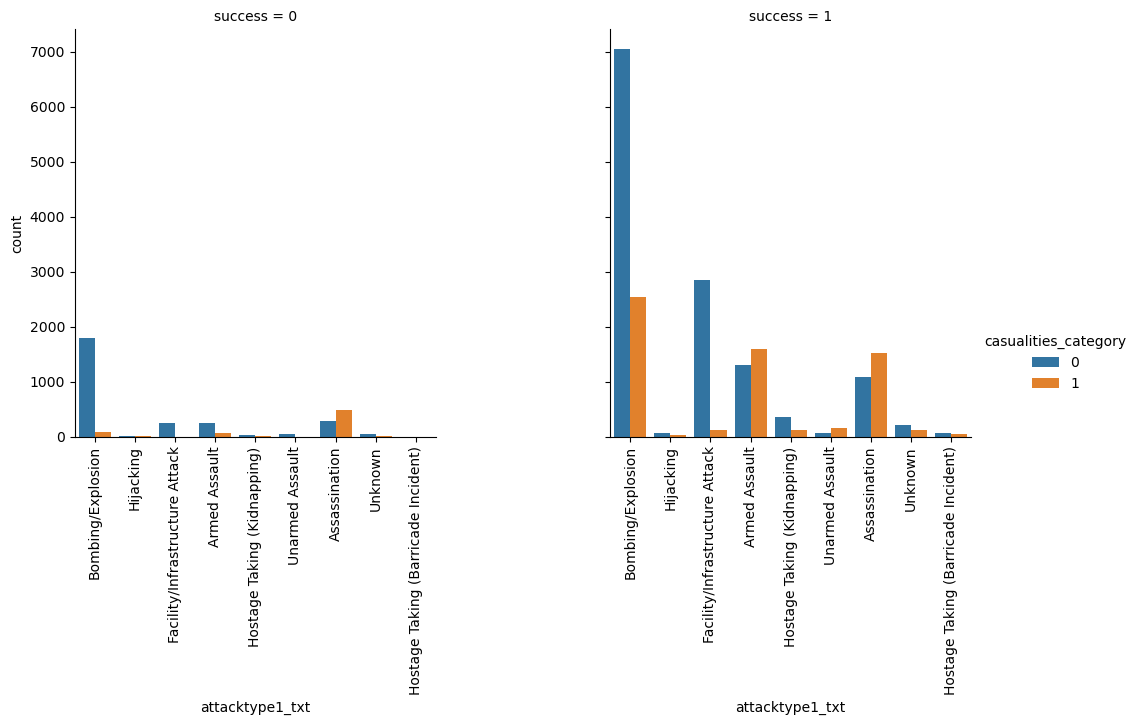

In [60]:
g = sns.catplot(data=df, x='attacktype1_txt', hue='casualities_category', col='success', kind='count')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

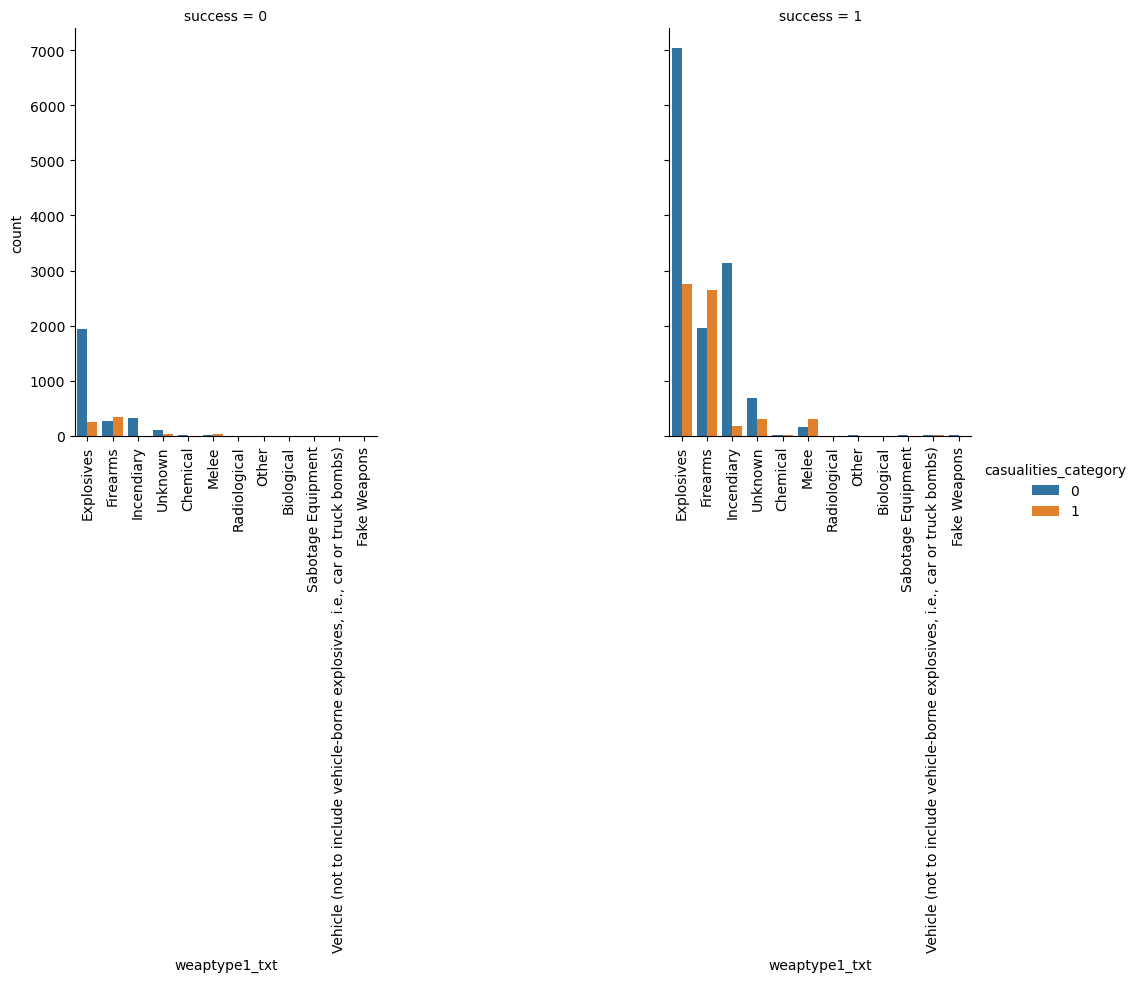

In [61]:
g = sns.catplot(data=df, x='weaptype1_txt', hue='casualities_category', col='success', kind='count')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

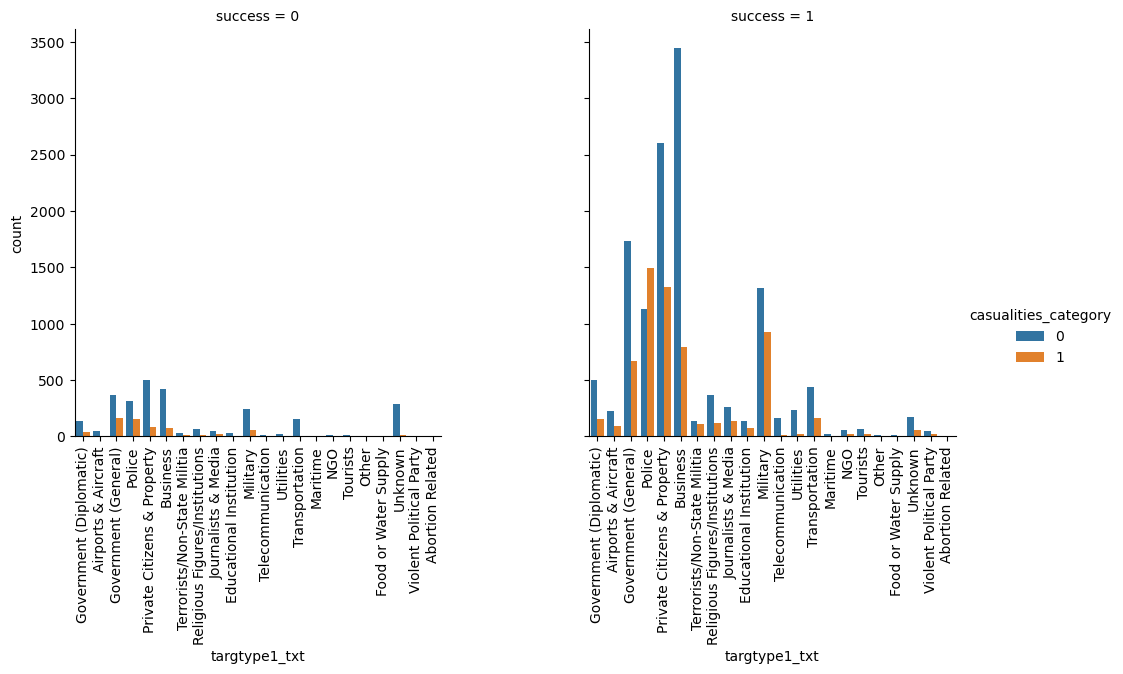

In [62]:
g = sns.catplot(data=df, x='targtype1_txt', hue='casualities_category', col='success', kind='count')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

In [77]:
# get these features
# X = df[['attacktype1_txt', 'weaptype1_txt', 'targtype1_txt', 'suicide', 'imonth', 'country_txt', 'casualities category']]
X = df[['attacktype1_txt', 'weaptype1_txt', 'targtype1_txt', 'suicide', 'imonth', 'country_txt', 'nhostkid']].fillna(0)

# convert string data into numerical data
X = pd.get_dummies(X)
# target column
# y = df['success']
y = df['casualities_category']

In [78]:
# split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# apply feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
def evaluate(y_pred, y_pred_proba, model_name):
    '''Utility method to evaluate the classification model'''
    acc = metrics.accuracy_score(y_test, y_pred)
    
    roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    
    print('Accuracy: %.2f' % acc)
    print('ROC-AUC Score: %.2f' % roc_auc)

    print(metrics.classification_report(y_test, y_pred))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax1)
    ax1.set_title(f'Confusion Matrix {model_name}')
    
    metrics.RocCurveDisplay.from_predictions(y_test, y_pred_proba, ax=ax2, 
                                             plot_chance_level=True, color="darkorange", name=model_name)
    ax2.set_title(f'ROC-AUC Curve {model_name}')
    fig.show()
    
    res_dict = {}
    res_dict['Model'] = model_name
    res_dict['accuracy'] = acc
    res_dict['roc-auc'] = roc_auc
    res_dict.update(metrics.classification_report(y_test, y_pred, output_dict=True)['macro avg'])
    
    return res_dict


Accuracy: 0.75
ROC-AUC Score: 0.79
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      3181
           1       0.59      0.48      0.53      1350

    accuracy                           0.75      4531
   macro avg       0.69      0.67      0.68      4531
weighted avg       0.73      0.75      0.74      4531



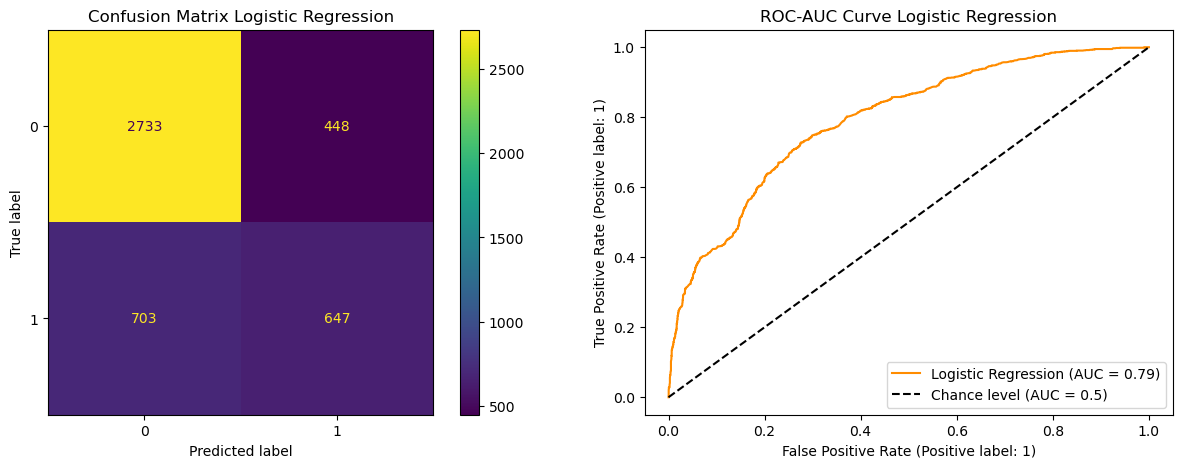

In [116]:
lg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = lg.predict(X_test)
y_pred_proba = lg.predict_proba(X_test)[:, 1]

results = []
results.append(evaluate(y_pred, y_pred_proba, 'Logistic Regression'))

Accuracy: 0.77
ROC-AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      3181
           1       0.79      0.32      0.45      1350

    accuracy                           0.77      4531
   macro avg       0.78      0.64      0.65      4531
weighted avg       0.77      0.77      0.73      4531



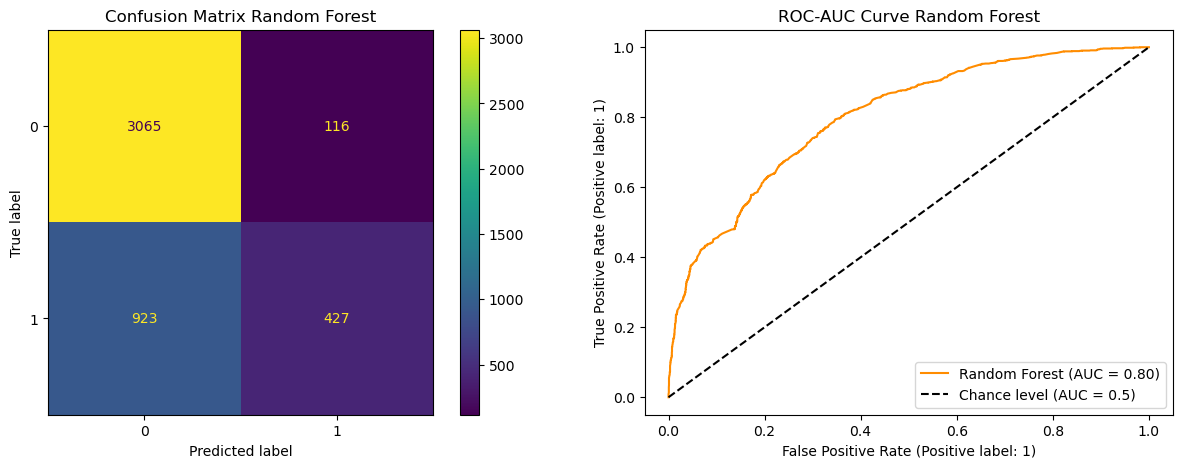

In [117]:
rf = RandomForestClassifier(random_state=0, max_depth=5).fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
results.append(evaluate(y_pred, y_pred_proba, 'Random Forest'))

Accuracy: 0.78
ROC-AUC Score: 0.76
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3181
           1       0.70      0.46      0.55      1350

    accuracy                           0.78      4531
   macro avg       0.75      0.69      0.70      4531
weighted avg       0.77      0.78      0.76      4531



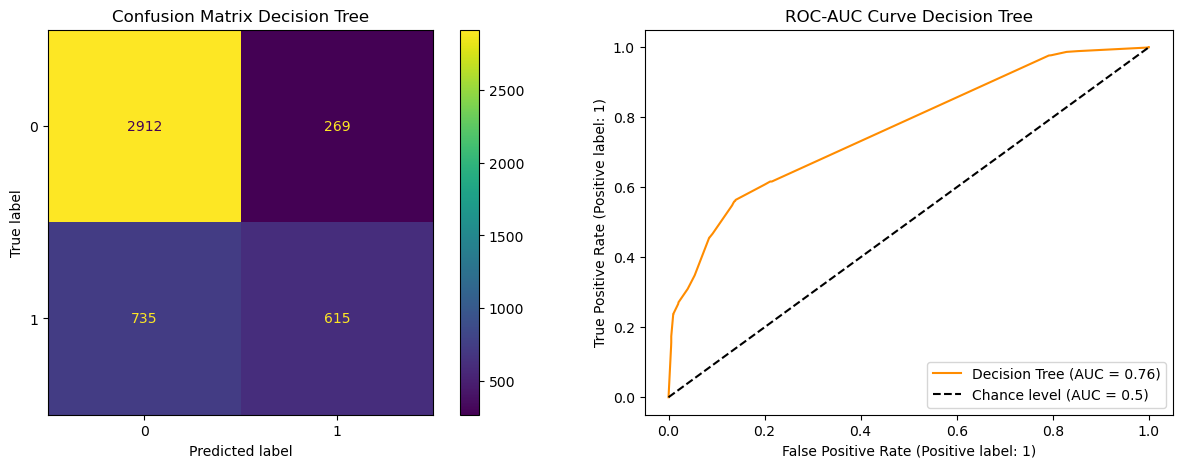

In [118]:
dt = DecisionTreeClassifier(random_state=0, max_depth=5).fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
results.append(evaluate(y_pred, y_pred_proba, 'Decision Tree'))

Accuracy: 0.79
ROC-AUC Score: 0.82
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3181
           1       0.76      0.44      0.56      1350

    accuracy                           0.79      4531
   macro avg       0.78      0.69      0.71      4531
weighted avg       0.79      0.79      0.77      4531



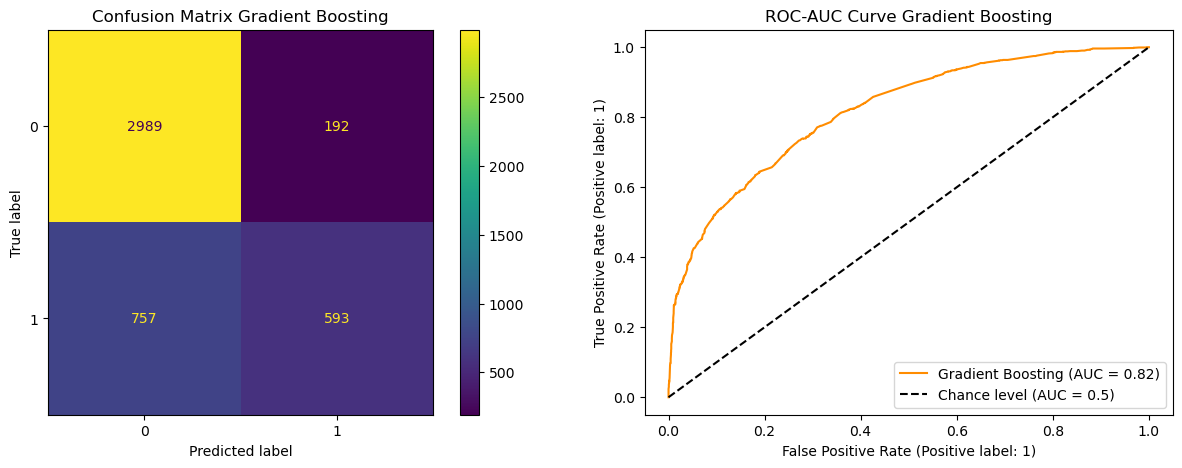

In [119]:
gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)[:, 1]
results.append(evaluate(y_pred, y_pred_proba, 'Gradient Boosting'))

In [120]:
res_df = pd.DataFrame(results).drop('support', axis=1).sort_values('f1-score').round(3)
res_df

,Model,accuracy,roc-auc,precision,recall,f1-score
1,Random Forest,0.771,0.800,0.777,0.640,0.653
0,Logistic Regression,0.746,0.793,0.693,0.669,0.678
2,Decision Tree,0.778,0.765,0.747,0.685,0.702
3,Gradient Boosting,0.791,0.817,0.777,0.689,0.709


In [121]:
def fine_tune_model(model, param_grid):
    '''Utility method to find best parameters for given machine learning model and find the best one'''
    # train the model with all the combinations of given parameters
    grid_search = GridSearchCV(model, param_grid, cv=3, verbose=1, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    # get the model with best cross-validation score
    best_model = grid_search.best_estimator_
    print("Best Cross Validation Score: %f \nBest Parameters: %s" % (grid_search.best_score_, grid_search.best_params_))
    return best_model

In [122]:
lg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1],
}

lg = LogisticRegression(random_state=0)

lg_tuned = fine_tune_model(lg, lg_param_grid)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Cross Validation Score: 0.808556 
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


Accuracy: 0.74
ROC-AUC Score: 0.79
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      3181
           1       0.59      0.46      0.52      1350

    accuracy                           0.74      4531
   macro avg       0.69      0.66      0.67      4531
weighted avg       0.73      0.74      0.73      4531



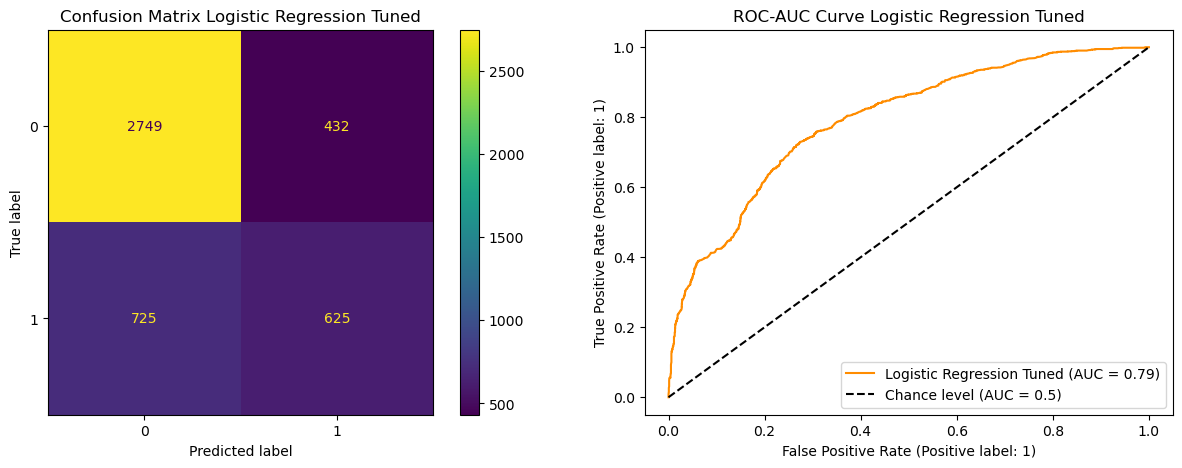

In [124]:
y_pred = lg_tuned.predict(X_test)
y_pred_proba = lg_tuned.predict_proba(X_test)[:, 1]
results.append(evaluate(y_pred, y_pred_proba, 'Logistic Regression Tuned'))

In [125]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15, 20]
}

rf = RandomForestClassifier(random_state=0)
rf_tuned = fine_tune_model(rf, rf_param_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Cross Validation Score: 0.839017 
Best Parameters: {'max_depth': 15, 'n_estimators': 200}


Accuracy: 0.80
ROC-AUC Score: 0.83
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3181
           1       0.78      0.46      0.58      1350

    accuracy                           0.80      4531
   macro avg       0.79      0.70      0.72      4531
weighted avg       0.80      0.80      0.78      4531



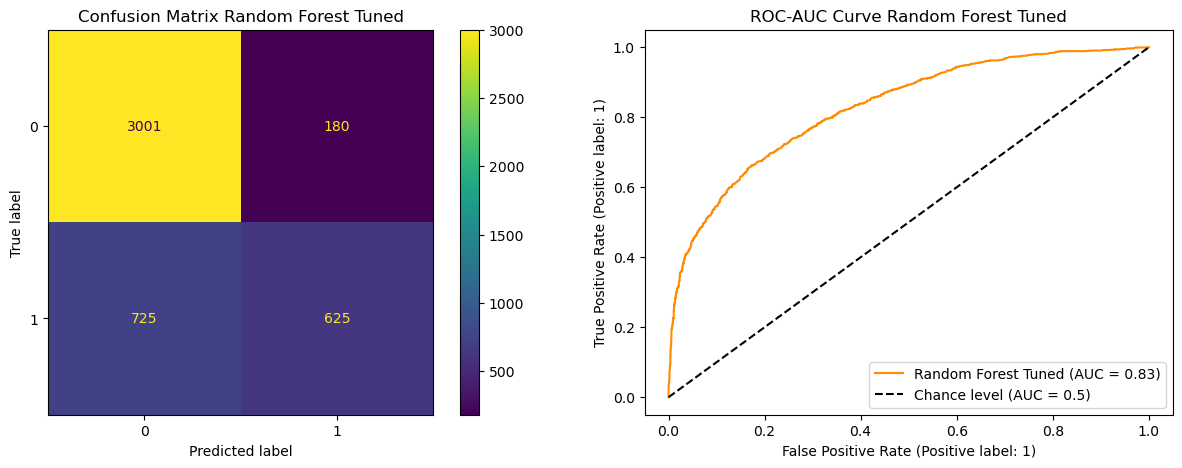

In [126]:
y_pred = rf_tuned.predict(X_test)
y_pred_proba = rf_tuned.predict_proba(X_test)[:, 1]

results.append(evaluate(y_pred, y_pred_proba, 'Random Forest Tuned'))

In [127]:
dt_param_grid = { 
    'max_depth' : [None, 5, 10, 15, 20],
    'criterion' : ['gini', 'entropy']
}
dt_tuned = DecisionTreeClassifier(random_state=0)
dt_tuned = fine_tune_model(dt_tuned, dt_param_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Cross Validation Score: 0.808700 
Best Parameters: {'criterion': 'gini', 'max_depth': 10}


Accuracy: 0.79
ROC-AUC Score: 0.80
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3181
           1       0.74      0.43      0.55      1350

    accuracy                           0.79      4531
   macro avg       0.77      0.69      0.70      4531
weighted avg       0.78      0.79      0.77      4531



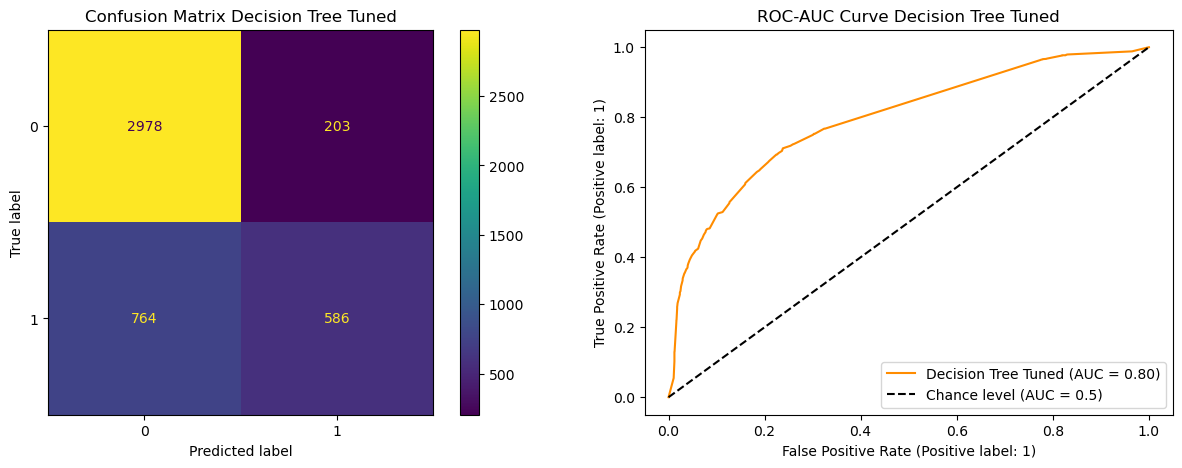

In [128]:
y_pred = dt_tuned.predict(X_test)
y_pred_proba = dt_tuned.predict_proba(X_test)[:, 1]

results.append(evaluate(y_pred, y_pred_proba, 'Decision Tree Tuned'))

In [129]:
gb_param_grid = {"n_estimators": [100, 200],
                 "subsample":[0.8,0.9,1],
                 "max_features":[0.7,0.8,1]}

gb_tuned = GradientBoostingClassifier(random_state=0)
gb_tuned = fine_tune_model(gb_tuned, gb_param_grid)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Cross Validation Score: 0.836712 
Best Parameters: {'max_features': 0.7, 'n_estimators': 200, 'subsample': 0.8}


Accuracy: 0.79
ROC-AUC Score: 0.82
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3181
           1       0.76      0.45      0.56      1350

    accuracy                           0.79      4531
   macro avg       0.78      0.69      0.71      4531
weighted avg       0.79      0.79      0.77      4531



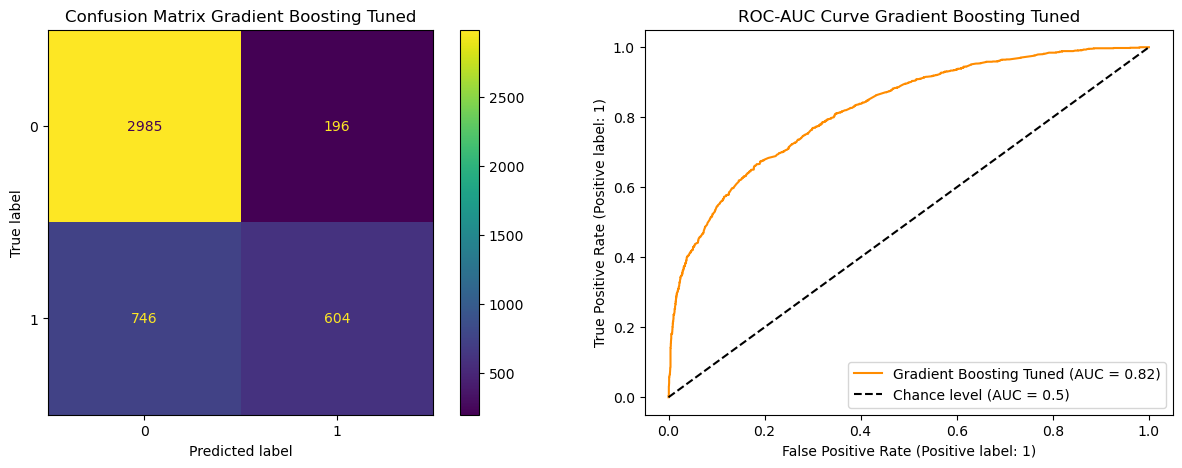

In [130]:
y_pred = gb_tuned.predict(X_test)
y_pred_proba = gb_tuned.predict_proba(X_test)[:, 1]

results.append(evaluate(y_pred, y_pred_proba, 'Gradient Boosting Tuned'))

In [134]:
res_df = pd.DataFrame(results).drop('support', axis=1).sort_values('roc-auc').round(3)
res_df

,Model,accuracy,roc-auc,precision,recall,f1-score
2,Decision Tree,0.778,0.765,0.747,0.685,0.702
4,Logistic Regression Tuned,0.745,0.792,0.691,0.664,0.673
0,Logistic Regression,0.746,0.793,0.693,0.669,0.678
6,Decision Tree Tuned,0.787,0.796,0.769,0.685,0.704
1,Random Forest,0.771,0.800,0.777,0.640,0.653
3,Gradient Boosting,0.791,0.817,0.777,0.689,0.709
7,Gradient Boosting Tuned,0.792,0.824,0.778,0.693,0.713
5,Random Forest Tuned,0.800,0.827,0.791,0.703,0.725


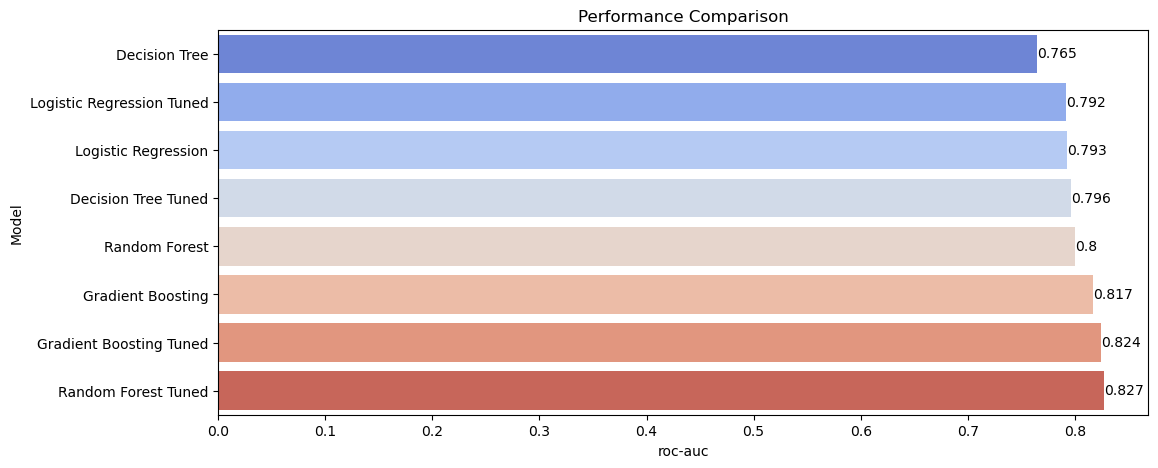

In [135]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=res_df, y='Model', x='roc-auc', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Performance Comparison')
plt.show()

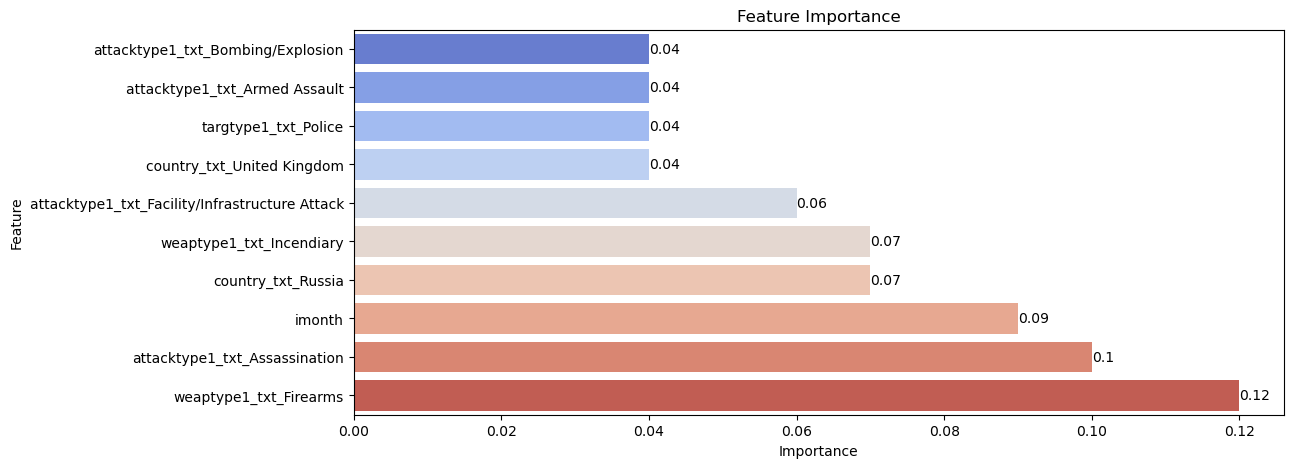

In [136]:
# use tuned random forest to check feature importance
fdf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_tuned.feature_importances_}).round(2)
fdf = fdf.sort_values(['Importance'])
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=fdf.tail(10), y='Feature', x='Importance', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Feature Importance')
plt.show()